In [1]:
from pyforest import *

In [2]:
cars_data = pd.read_csv('Cars93.csv')

In [3]:
cars_data.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
cars_data.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [5]:
cars_data.shape

(93, 27)

In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [8]:
np.unique(cars_data['Manufacturer'])

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda',
       'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [9]:
cars_data[['Manufacturer', 'Model', 'MPG.city']].head()

,Manufacturer,Model,MPG.city
0,Acura,Integra,25
1,Acura,Legend,18
2,Audi,90,20
3,Audi,100,19
4,BMW,535i,22


In [11]:
cars_under_35 = cars_data[cars_data.Price <= 35]
cars_under_35.shape

(86, 27)

In [12]:
cars_data.iloc[[12, 19, 47]]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
12,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,4,2.2,110,5200,2665,Yes,15.6,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
19,Chrylser,Concorde,Large,18.4,18.4,18.4,20,28,Driver & Passenger,Front,6,3.3,153,5300,1990,No,18.0,6,203,113,74,40,31.0,15.0,3515,USA,Chrylser Concorde
47,Infiniti,Q45,Midsize,45.4,47.9,50.4,17,22,Driver only,Rear,8,4.5,278,6000,1955,No,22.5,5,200,113,72,42,29.0,15.0,4000,non-USA,Infiniti Q45


In [13]:
cars_data.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
      ...  
88     True
89    False
90    False
91    False
92    False
Length: 93, dtype: bool

In [14]:
cars_data.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [16]:
cars_data_nulls = cars_data[cars_data.isnull().any(axis=1)]
cars_data_nulls[['Manufacturer', 'Model', 'Rear.seat.room', 'Luggage.room']]

,Manufacturer,Model,Rear.seat.room,Luggage.room
15,Chevrolet,Lumina_APV,30.5,NaN
16,Chevrolet,Astro,33.5,NaN
18,Chevrolet,Corvette,NaN,NaN
25,Dodge,Caravan,26.5,NaN
35,Ford,Aerostar,30.0,NaN
55,Mazda,MPV,27.5,NaN
56,Mazda,RX-7,NaN,NaN
65,Nissan,Quest,27.0,NaN
69,Oldsmobile,Silhouette,30.5,NaN
86,Toyota,Previa,35.0,NaN


In [17]:
cars_data_nulls.index

Int64Index([15, 16, 18, 25, 35, 55, 56, 65, 69, 86, 88], dtype='int64')

In [18]:
cars_data.dropna(axis = 0, inplace=True)

In [19]:
cars_data.shape

(82, 27)

In [20]:
selected_columns = ['Manufacturer', 'Price', 'MPG.city', 'DriveTrain', 'EngineSize', 'Horsepower', 'Weight', 'Origin']

In [21]:
cars_data = cars_data[selected_columns]

In [22]:
cars_data.shape

(82, 8)

In [23]:
cars_data.head()

,Manufacturer,Price,MPG.city,DriveTrain,EngineSize,Horsepower,Weight,Origin
0,Acura,15.9,25,Front,1.8,140,2705,non-USA
1,Acura,33.9,18,Front,3.2,200,3560,non-USA
2,Audi,29.1,20,Front,2.8,172,3375,non-USA
3,Audi,37.7,19,Front,2.8,172,3405,non-USA
4,BMW,30.0,22,Rear,3.5,208,3640,non-USA


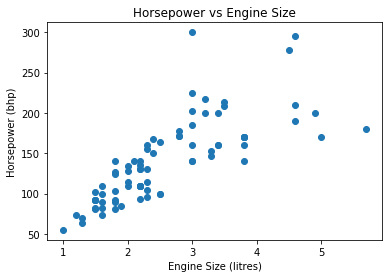

In [25]:
plt.scatter(cars_data['EngineSize'], cars_data['Horsepower'])
plt.title('Horsepower vs Engine Size')
plt.xlabel('Engine Size (litres)')
plt.ylabel('Horsepower (bhp)')
plt.show()

In [26]:
cars_data['Origin'].unique()

array(['non-USA', 'USA'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [28]:
cars_data['Origin'] = label_encoder.fit_transform(cars_data['Origin'])

In [29]:
cars_data.sample(5)

,Manufacturer,Price,MPG.city,DriveTrain,EngineSize,Horsepower,Weight,Origin
40,Honda,19.8,24,Front,2.3,160,2865,1
70,Oldsmobile,20.7,19,Front,3.8,170,3470,0
64,Nissan,15.7,24,Front,2.4,150,3050,1
41,Honda,12.1,42,Front,1.5,102,2350,1
50,Lincoln,34.3,17,Front,3.8,160,3695,0


In [30]:
categorical_features = cars_data.dtypes == object

In [31]:
categorical_features

Manufacturer     True
Price           False
MPG.city        False
DriveTrain       True
EngineSize      False
Horsepower      False
Weight          False
Origin          False
dtype: bool

In [32]:
cars_data['DriveTrain'].unique()

array(['Front', 'Rear', '4WD'], dtype=object)

In [33]:
cars_data = pd.get_dummies(cars_data)

In [34]:
cars_data.head()

,Price,MPG.city,EngineSize,Horsepower,Weight,Origin,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,Manufacturer_Geo,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Infiniti,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mazda,Manufacturer_Mercedes-Benz,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear
0,15.9,25,1.8,140,2705,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33.9,18,3.2,200,3560,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,29.1,20,2.8,172,3375,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,37.7,19,2.8,172,3405,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30.0,22,3.5,208,3640,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
X = cars_data.drop('Price', axis=1)
Y = cars_data['Price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [46]:
model = LinearRegression().fit(x_train, y_train)

In [47]:
model.score(x_train, y_train)

0.9528372714613894

In [49]:
mean_squared_error(y_test, model.predict(x_test))

50.53403744325084

In [50]:
r2_score(y_test, model.predict(x_test))

0.666022097149247

In [51]:
r2_score(y_train, model.predict(x_train))

0.9528372714613895

In [52]:
mean_squared_error(y_train, model.predict(x_train))

3.7078160960659905